In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
df1 = pd.read_csv('raw_data/XRD_protein_properties.csv', encoding = 'utf8')

In [3]:
df1.describe()

Unnamed: 0  Matthews Coefficient  Percent Solvent Content  \
count  36287.000000          36287.000000             36287.000000   
mean   18143.000000              2.789026                53.302971   
std    10475.298946              0.759500                10.212654   
min        0.000000              0.410000                 0.360000   
25%     9071.500000              2.300000                46.420000   
50%    18143.000000              2.610000                52.950000   
75%    27214.500000              3.060000                59.870000   
max    36286.000000             13.890000                90.010000   

                pH      Temp (K)  Resolution (Å)  High Resolution Limit  \
count  36287.00000  36287.000000    36287.000000           36287.000000   
mean       6.81265    290.673621        2.363104               2.363104   
std        1.21271      6.923847        0.676512               0.676512   
min        1.00000    100.000000        0.750000               0.750000   
25%        6.00000    291.000000        1.900000               1.900000   
50%        7.00000    293.000000        2.300000               2.300000   
75%        7.50000    294.000000        2.750000               2.750000   
max       11.10000    323.000000        9.700000               9.700000   

          Entity ID  Sequence Length  Hydrophobic Residues  \
count  36287.000000     36287.000000          36287.000000   
mean       1.741119       216.887287            101.686913   
std        2.808480       178.518286             86.831546   
min        1.000000         2.000000              0.000000   
25%        1.000000       100.000000             44.000000   
50%        1.000000       207.000000             90.000000   
75%        2.000000       291.000000            138.000000   
max       89.000000      4128.000000           1911.000000   

       Hydrophilic Residues  Aromatic Residues  Molecular Weight (kDa)  \
count          36287.000000       36287.000000            36287.000000   
mean             114.956100          19.736435               24.302671   
std               92.343492          17.255249               19.967591   
min                1.000000           0.000000                0.029060   
25%               54.000000           7.000000               11.331060   
50%              112.000000          18.000000               22.872270   
75%              152.500000          27.000000               32.972955   
max             2036.000000         352.000000              447.944640   

        Hydro Ratio  Isoelectric Point  Alipathic Index  Charge at pH 7  \
count  36287.000000       36287.000000     36287.000000    36287.000000   
mean       0.945482           6.899303        75.356588        6.154876   
std        0.658701           1.766878        24.263120        6.115764   
min        0.000000           4.050028         0.000000        0.000000   
25%        0.747368           5.504936        66.666667        1.000000   
50%        0.865285           6.414360        77.876448        4.000000   
75%        1.000000           8.469872        88.474548        9.000000   
max       26.000000          11.999968       260.000000       86.000000   

       Cardin-Weintraub Motif  
count            36287.000000  
mean                 0.422052  
std                  0.493894  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  1.000000

In [4]:
df1.columns

Index(['Unnamed: 0', 'Entry ID', 'Experimental Method', 'Matthews Coefficient',
       'Percent Solvent Content', 'Crystallization Method', 'pH',
       'Crystal Growth Procedure', 'Temp (K)', 'DOI', 'PDB ID',
       'Resolution (Å)', 'High Resolution Limit', 'Structure Title',
       'Sequence', 'Source Organism', 'Gene Name', 'Macromolecule Name',
       'Entity ID', 'Sequence Length', 'Hydrophobic Residues',
       'Hydrophilic Residues', 'Aromatic Residues', 'Molecular Weight (kDa)',
       'Hydro Ratio', 'Isoelectric Point', 'Alipathic Index', 'Charge at pH 7',
       'Cardin-Weintraub Motif'],
      dtype='object')

Text(0.5, 1.0, 'Cardin-Weintraub Motif')

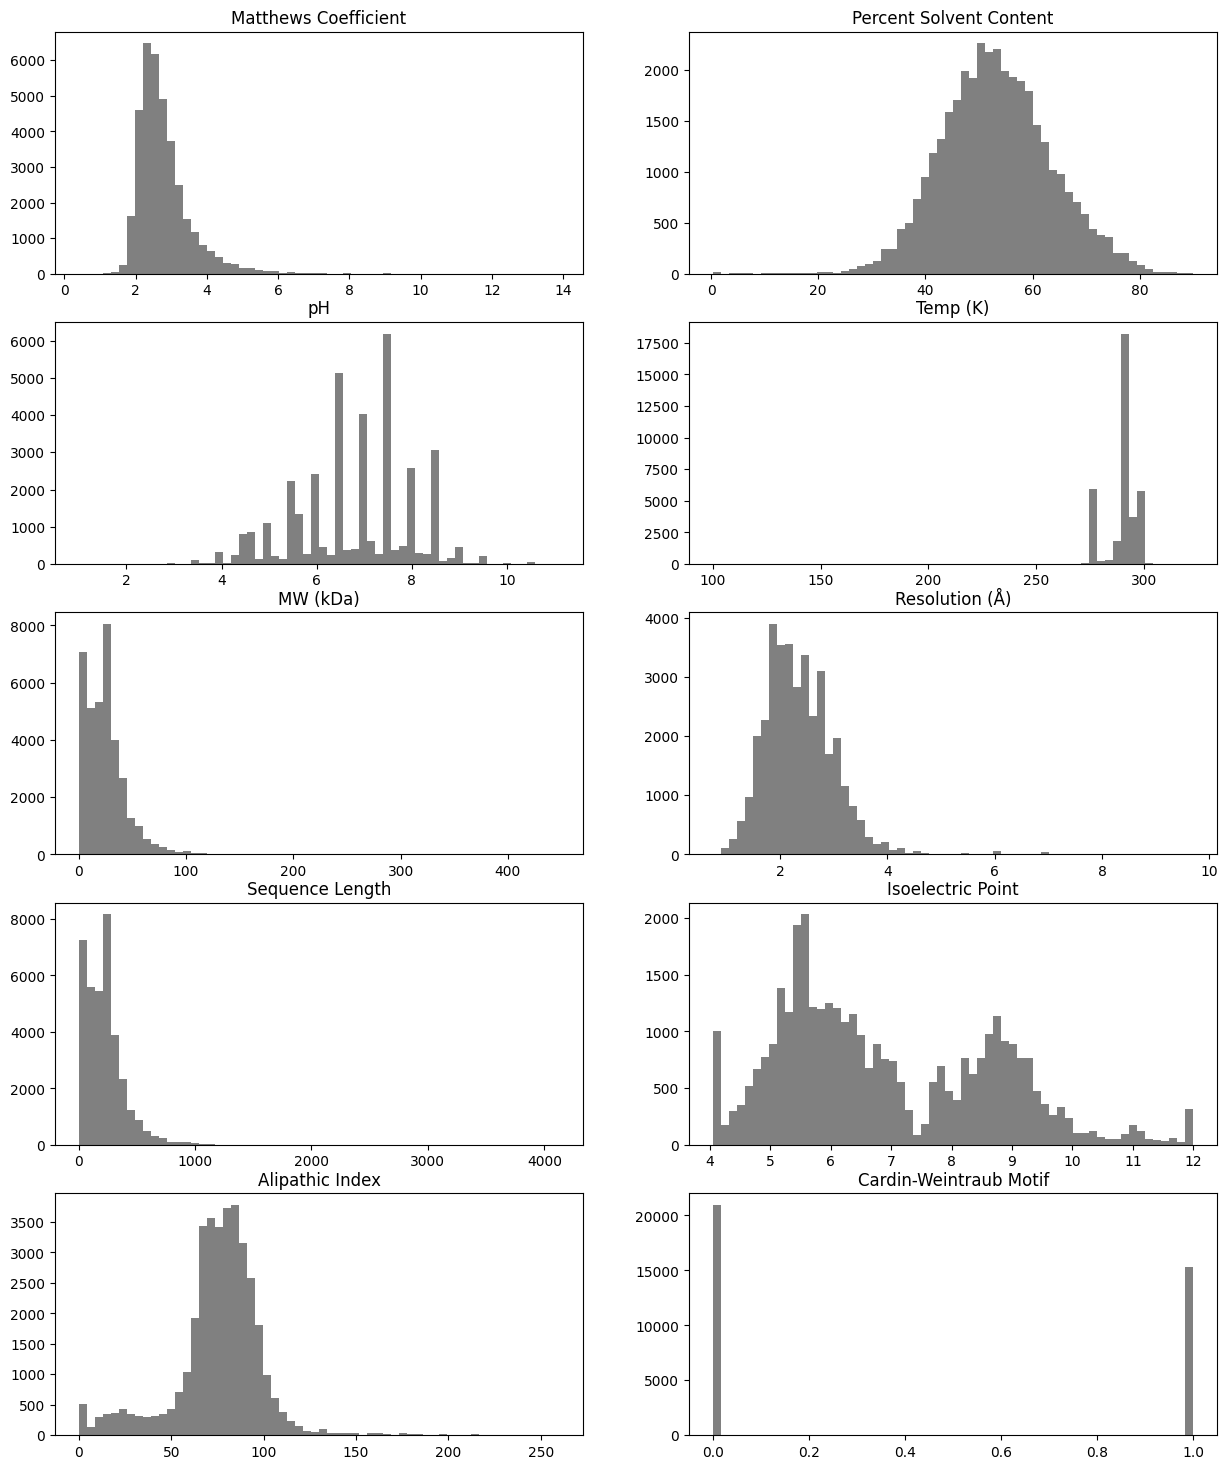

In [5]:
plt.figure(figsize=(15,22))

plt.subplot(6,2,1)
plt.hist(df1['Matthews Coefficient'], bins=60, color='grey')
plt.title('Matthews Coefficient')

plt.subplot(6,2,2)
plt.hist(df1['Percent Solvent Content'], bins=60, color='grey')
plt.title('Percent Solvent Content')

plt.subplot(6,2,3)
plt.hist(df1['pH'], bins=60, color='grey')
plt.title('pH')

plt.subplot(6,2,4)
plt.hist(df1['Temp (K)'], bins=60, color='grey')
plt.title('Temp (K)')

plt.subplot(6,2,5)
plt.hist(df1['Molecular Weight (kDa)'], bins=60, color='grey')
plt.title('MW (kDa)')

plt.subplot(6,2,6)
plt.hist(df1['Resolution (Å)'], bins=60, color='grey')
plt.title('Resolution (Å)')

plt.subplot(6,2,7)
plt.hist(df1['Sequence Length'], bins=60, color='grey')
plt.title('Sequence Length')

plt.subplot(6,2,8)
plt.hist(df1['Isoelectric Point'], bins=60, color='grey')
plt.title('Isoelectric Point')

plt.subplot(6,2,9)
plt.hist(df1['Alipathic Index'], bins=60, color='grey')
plt.title('Alipathic Index')

plt.subplot(6,2,10)
plt.hist(df1['Cardin-Weintraub Motif'], bins=60, color='grey')
plt.title('Cardin-Weintraub Motif')

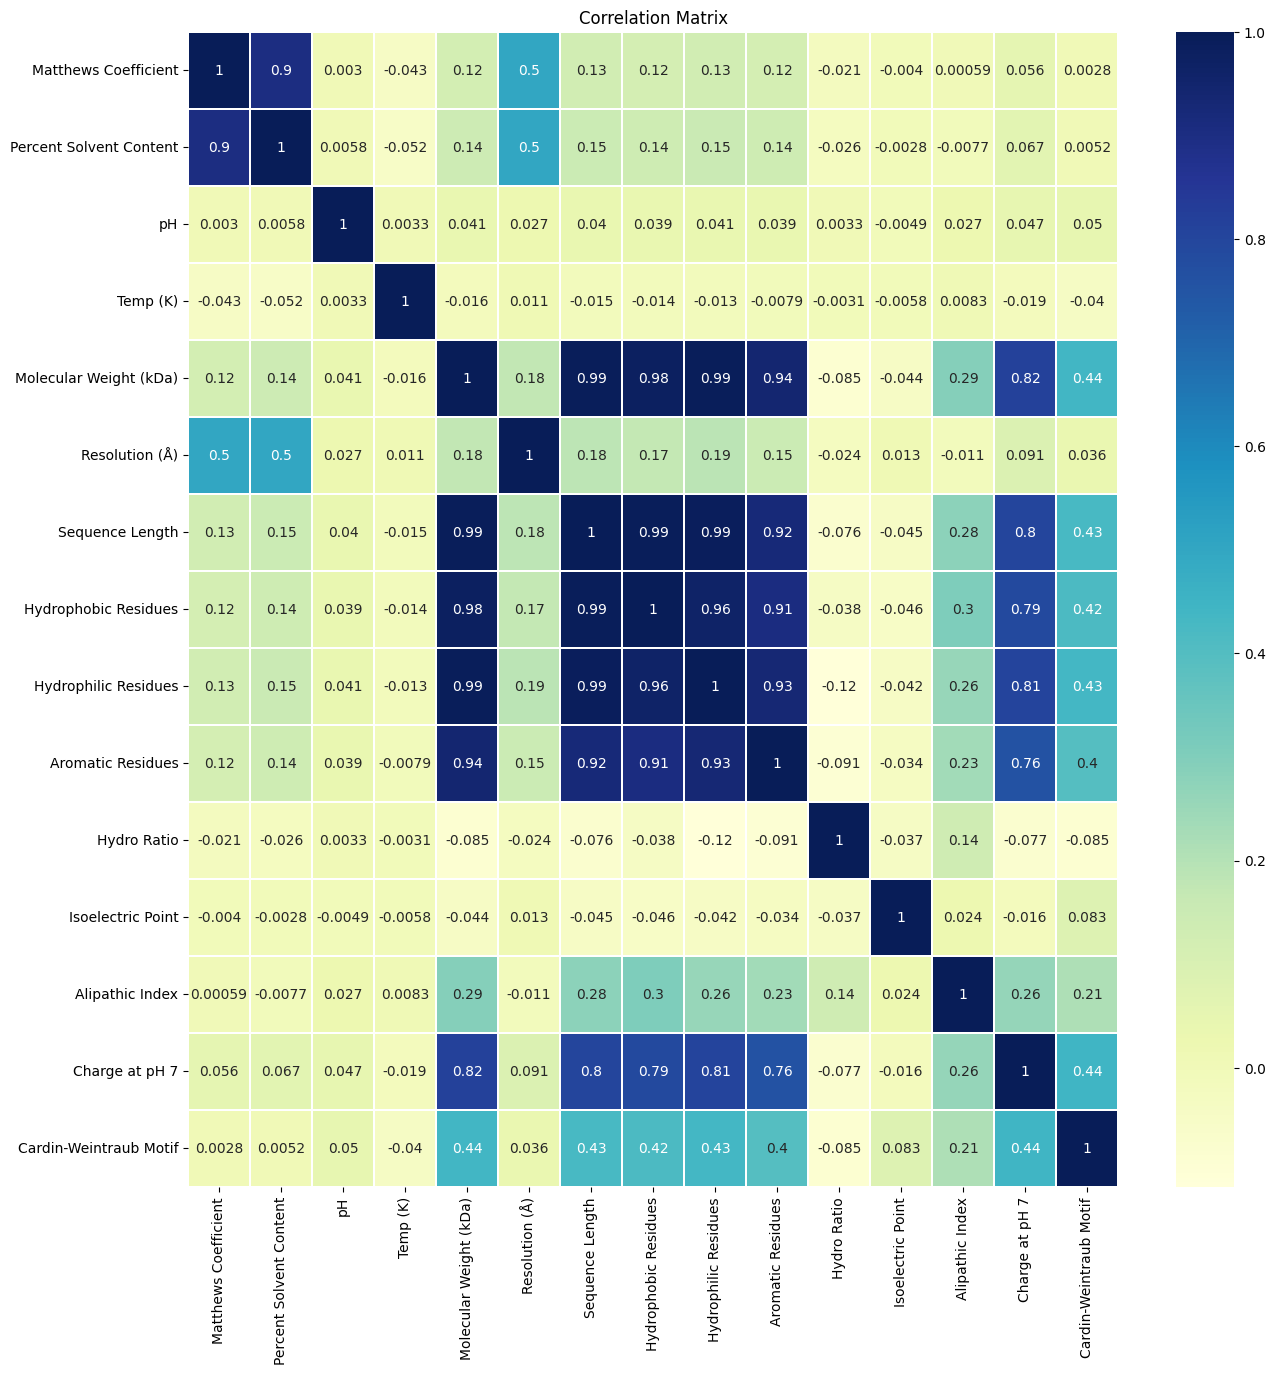

In [6]:
plt.figure(figsize=(15,15))

df1_subset1 = df1[['Matthews Coefficient', 'Percent Solvent Content', 'pH',
       'Temp (K)', 'Molecular Weight (kDa)', 'Resolution (Å)',
       'Sequence Length', 'Hydrophobic Residues', 'Hydrophilic Residues',
       'Aromatic Residues', 'Hydro Ratio', 'Isoelectric Point',
       'Alipathic Index', 'Charge at pH 7', 'Cardin-Weintraub Motif']]

sns.heatmap(df1_subset1.corr(numeric_only=True), linewidth=.1, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

<Figure size 2500x2500 with 0 Axes>

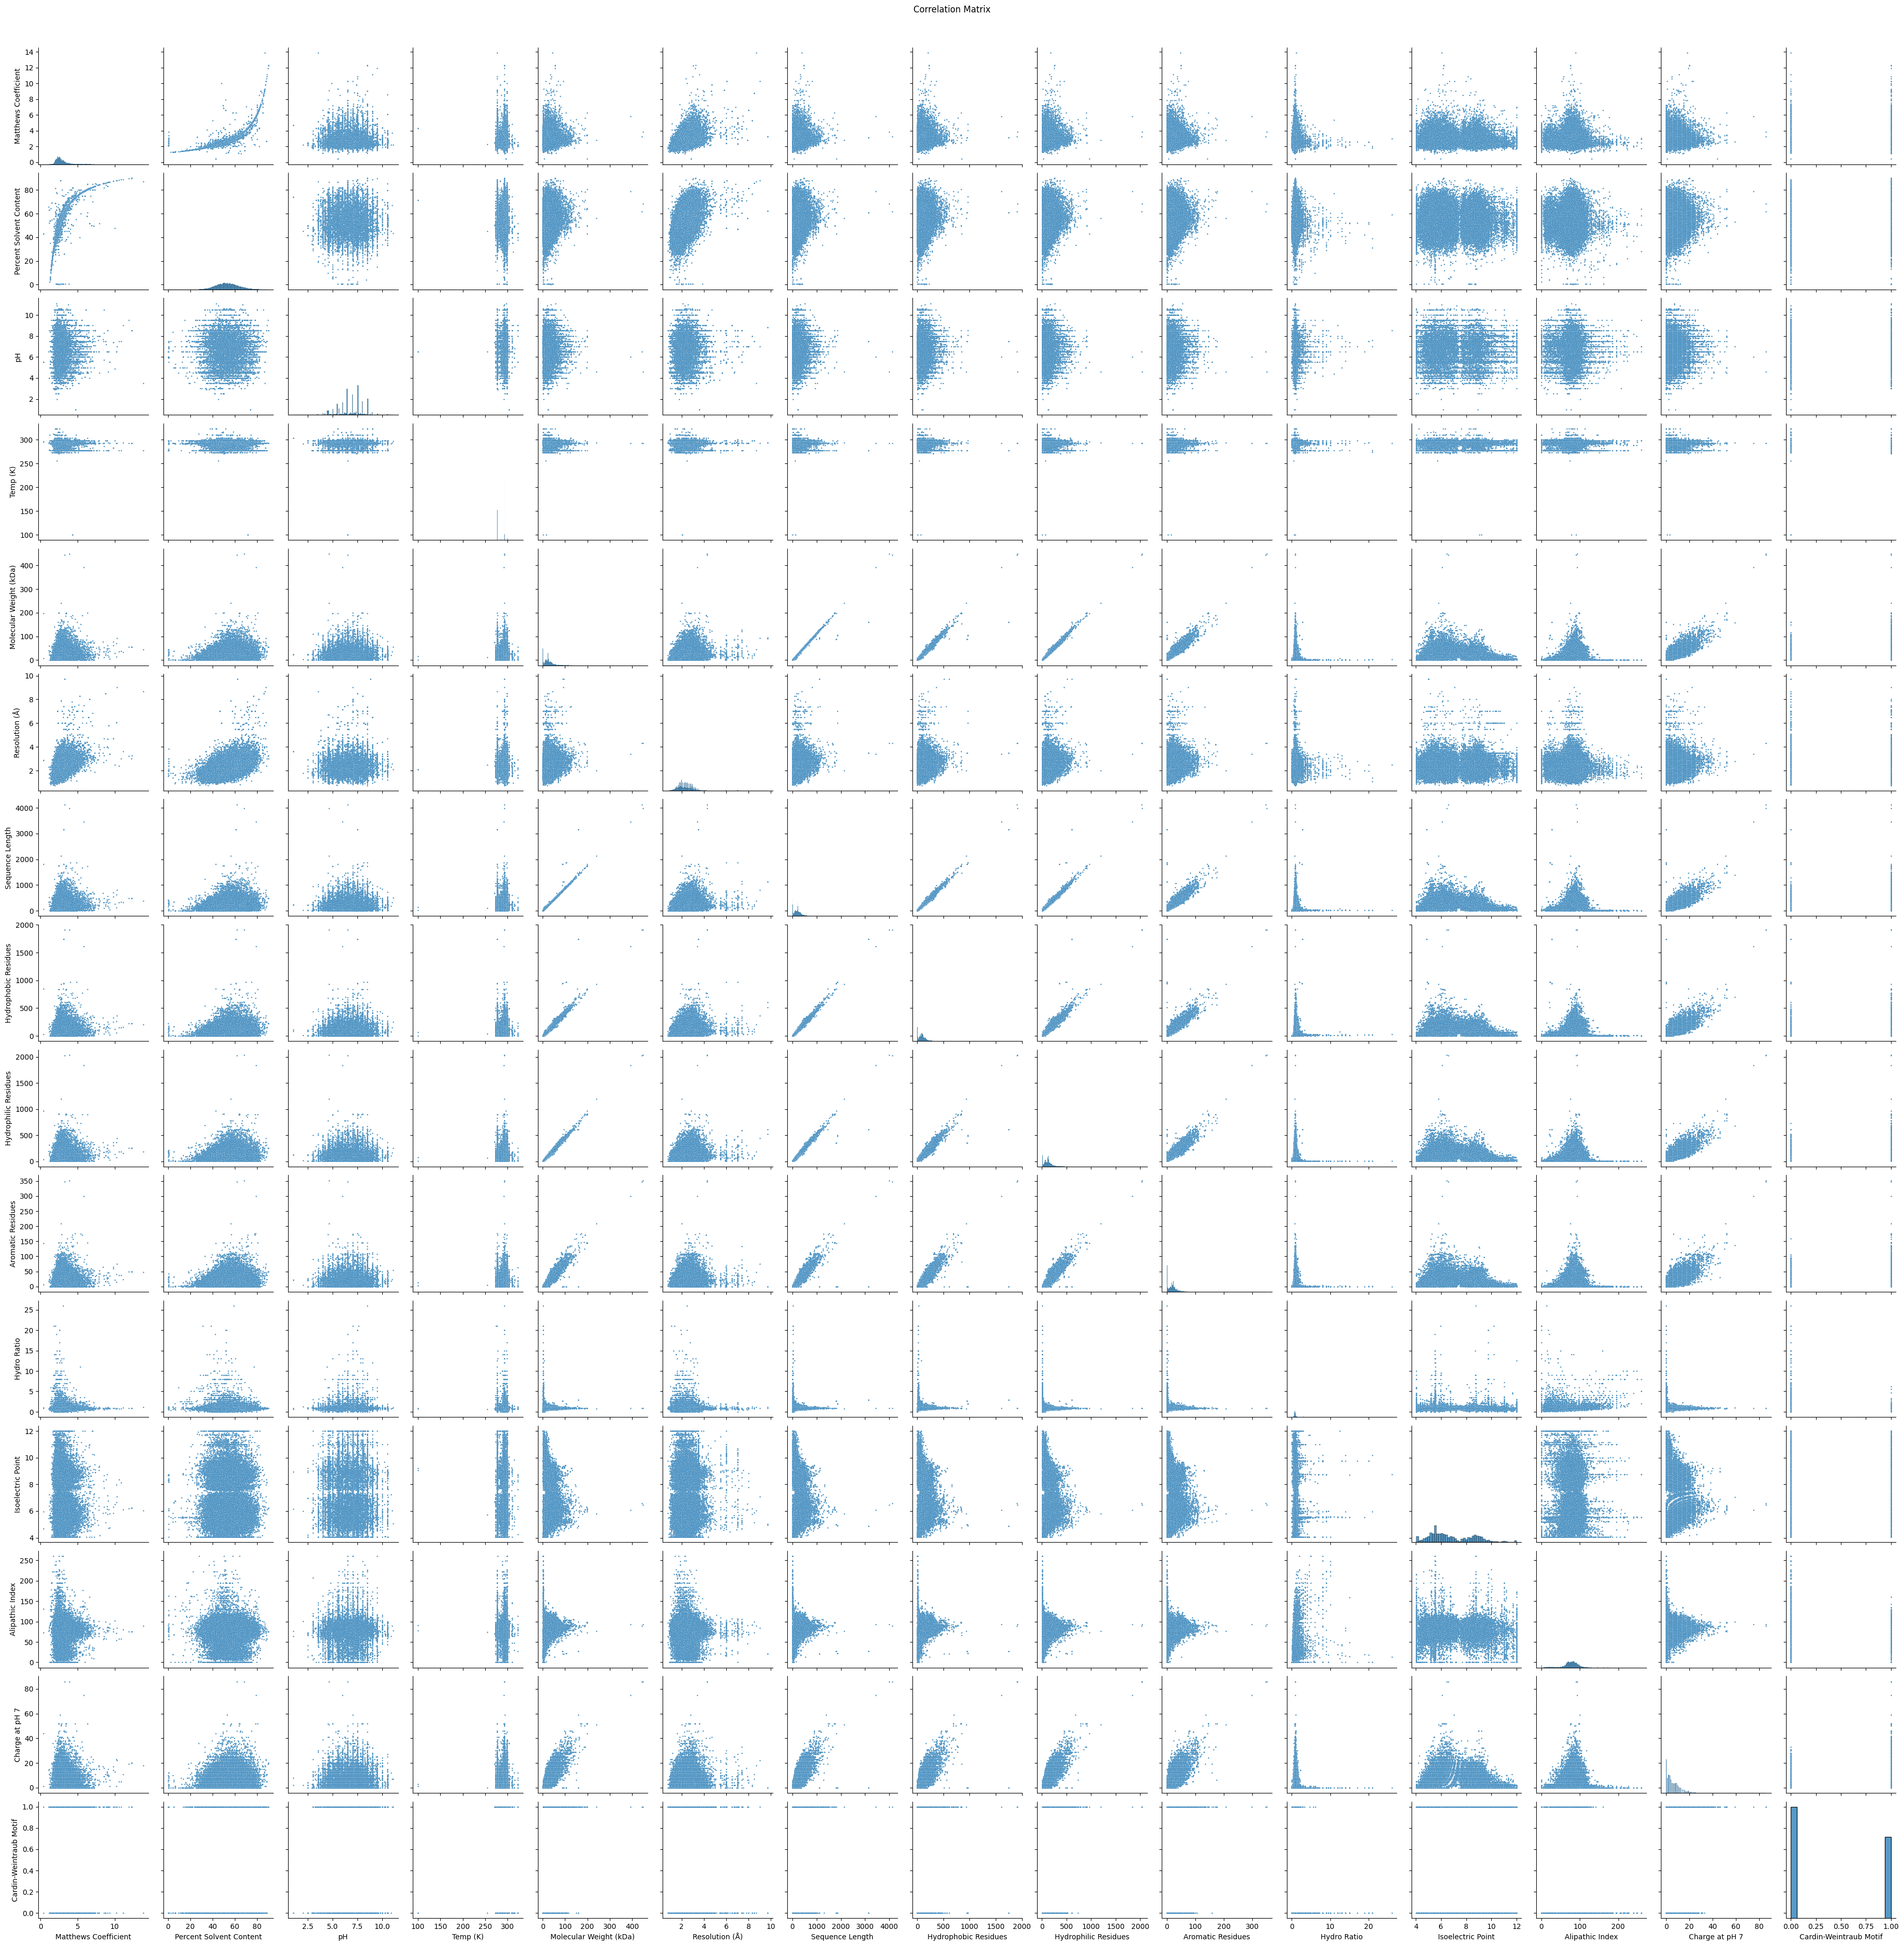

In [7]:
#all dataset properties in pair plot
df1_subset1 = df1[['Matthews Coefficient', 'Percent Solvent Content', 'pH',
                   'Temp (K)', 'Molecular Weight (kDa)', 'Resolution (Å)',
                   'Sequence Length', 'Hydrophobic Residues', 'Hydrophilic Residues',
                   'Aromatic Residues', 'Hydro Ratio', 'Isoelectric Point',
                   'Alipathic Index', 'Charge at pH 7', 'Cardin-Weintraub Motif']]

plt.figure(figsize=(25,25))
graph = sns.pairplot(df1_subset1, plot_kws={"s": 3})
graph.fig.suptitle('Correlation Matrix', y=1.01)
plt.show()

<Figure size 2500x2500 with 0 Axes>

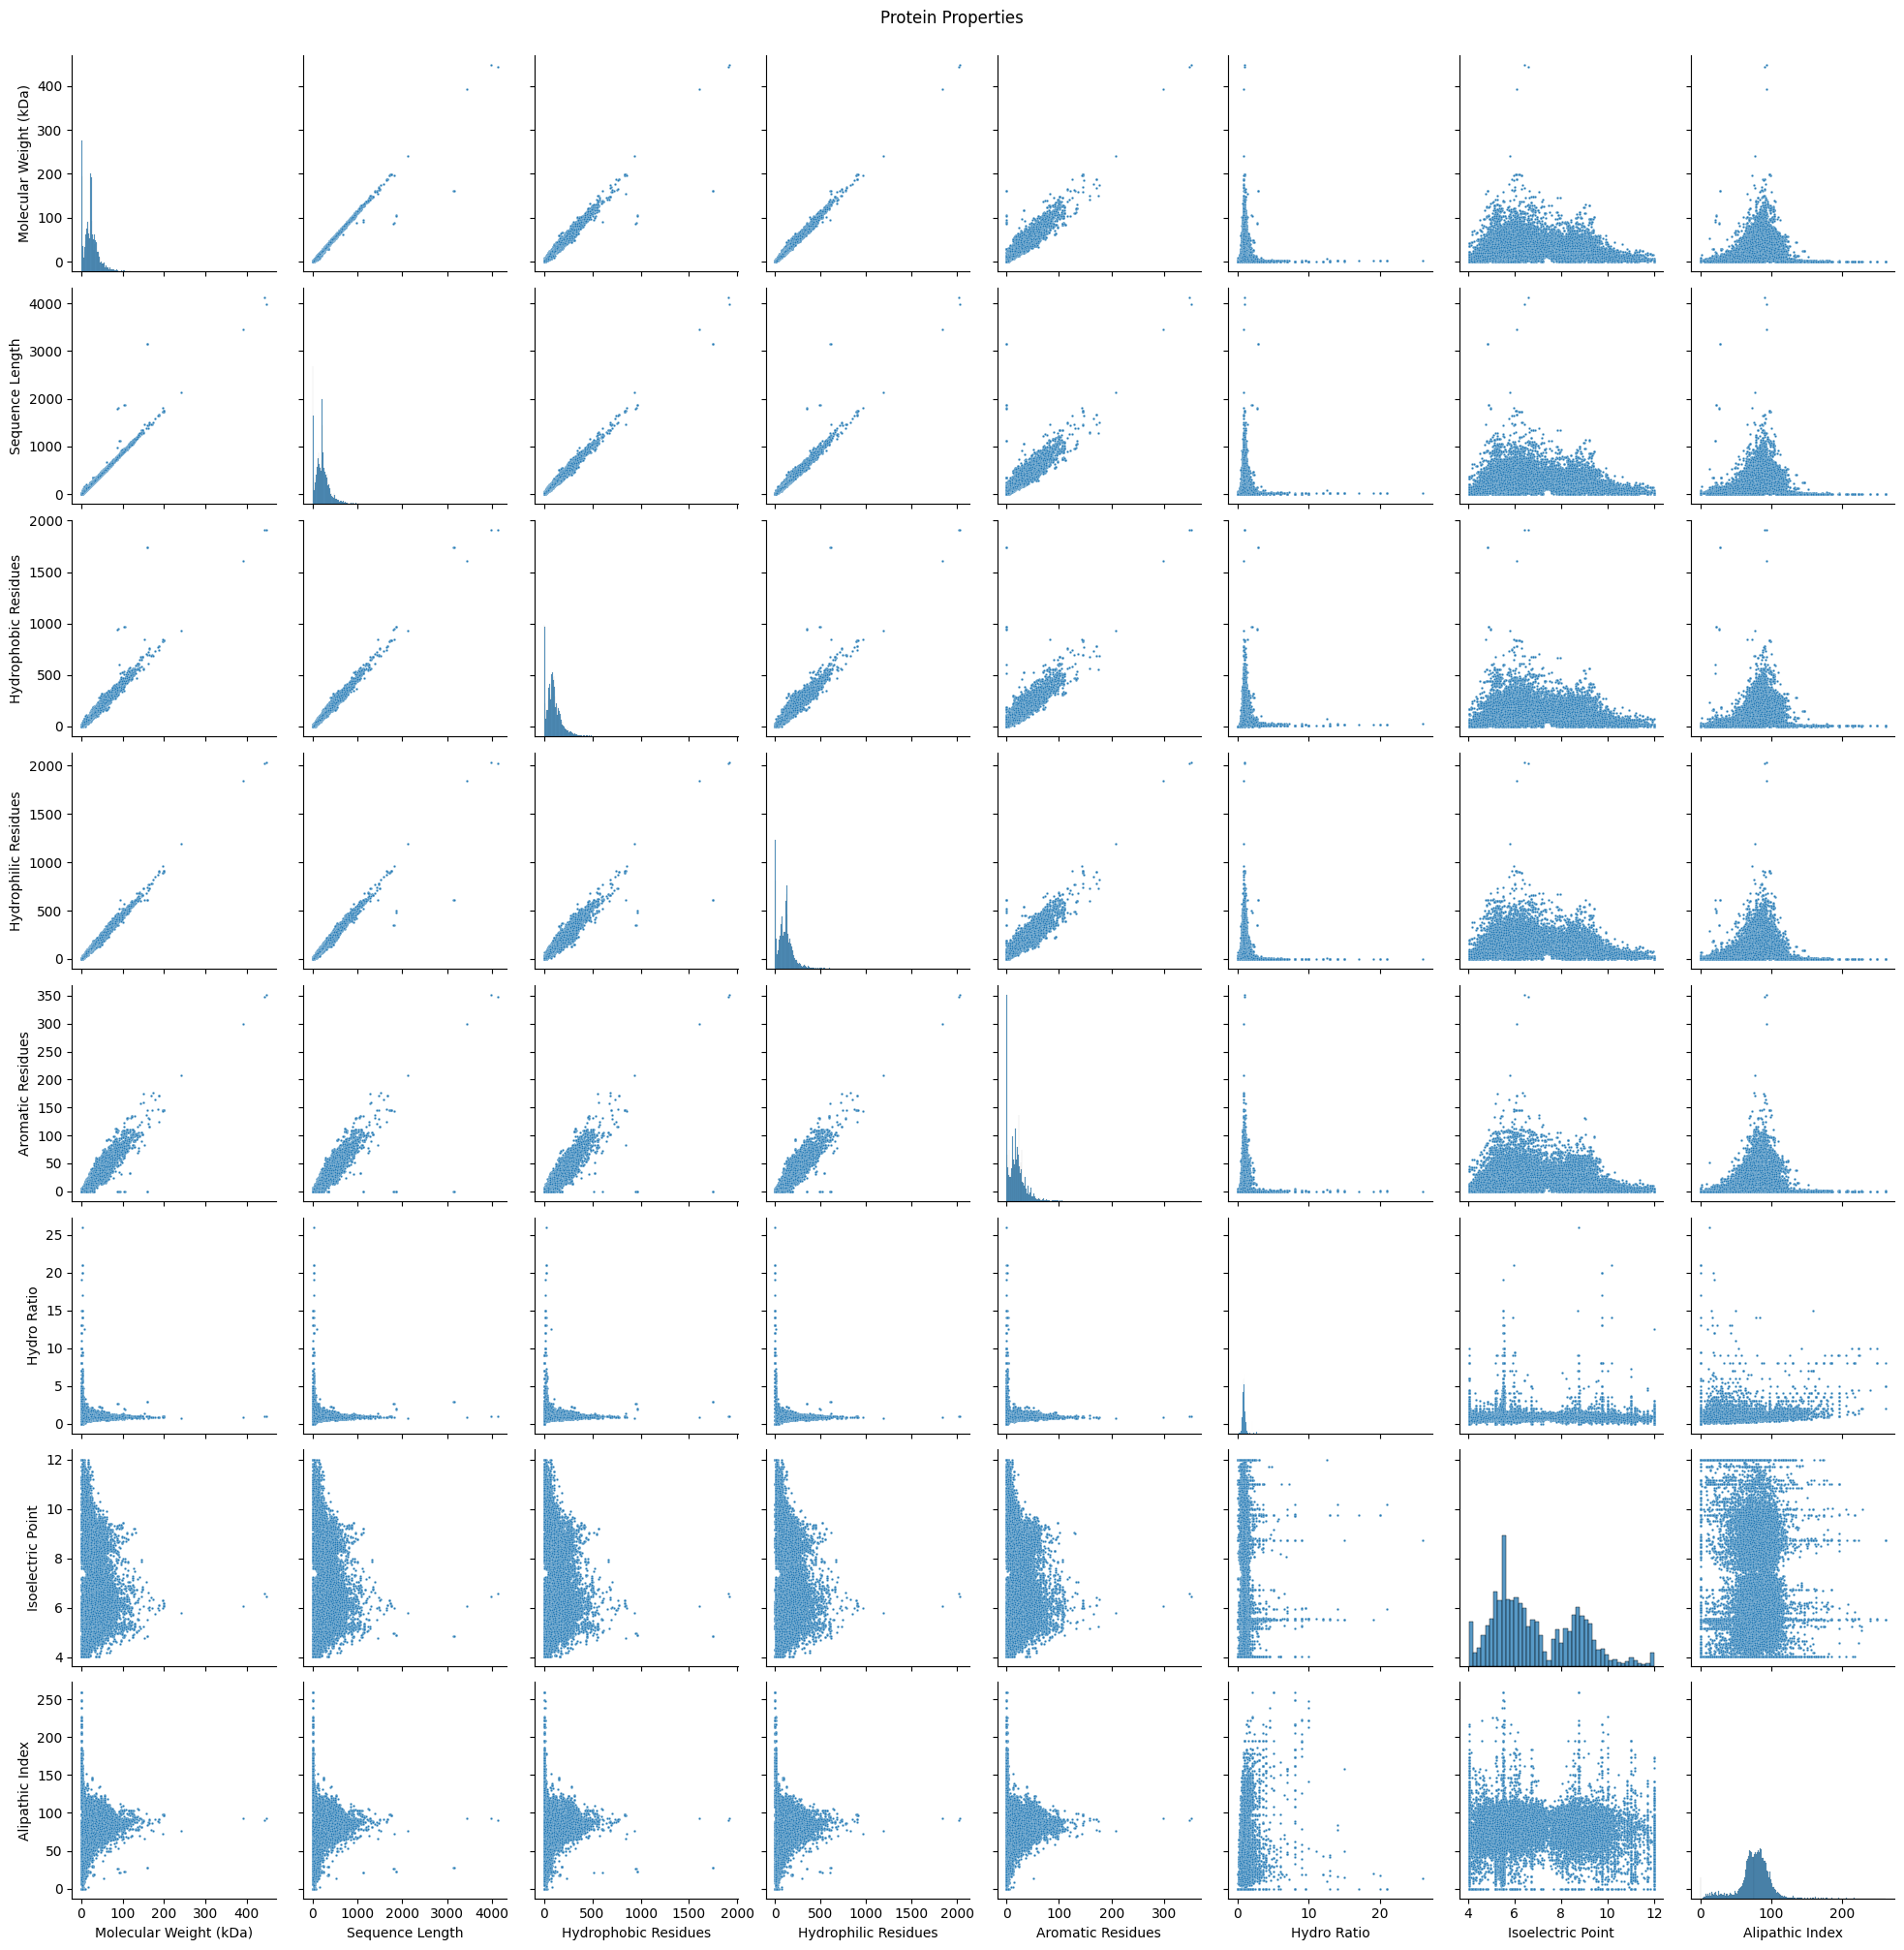

In [8]:
#general protein properties
df1_subset2 = df1[['Molecular Weight (kDa)','Sequence Length', 
                    'Hydrophobic Residues', 'Hydrophilic Residues',
                   'Aromatic Residues', 'Hydro Ratio', 'Isoelectric Point',
                   'Alipathic Index']]

plt.figure(figsize=(25,25))
graph = sns.pairplot(df1_subset2, plot_kws={"s": 3})
graph.fig.suptitle('Protein Properties', y=1.01)
plt.show()

<Figure size 2500x2500 with 0 Axes>

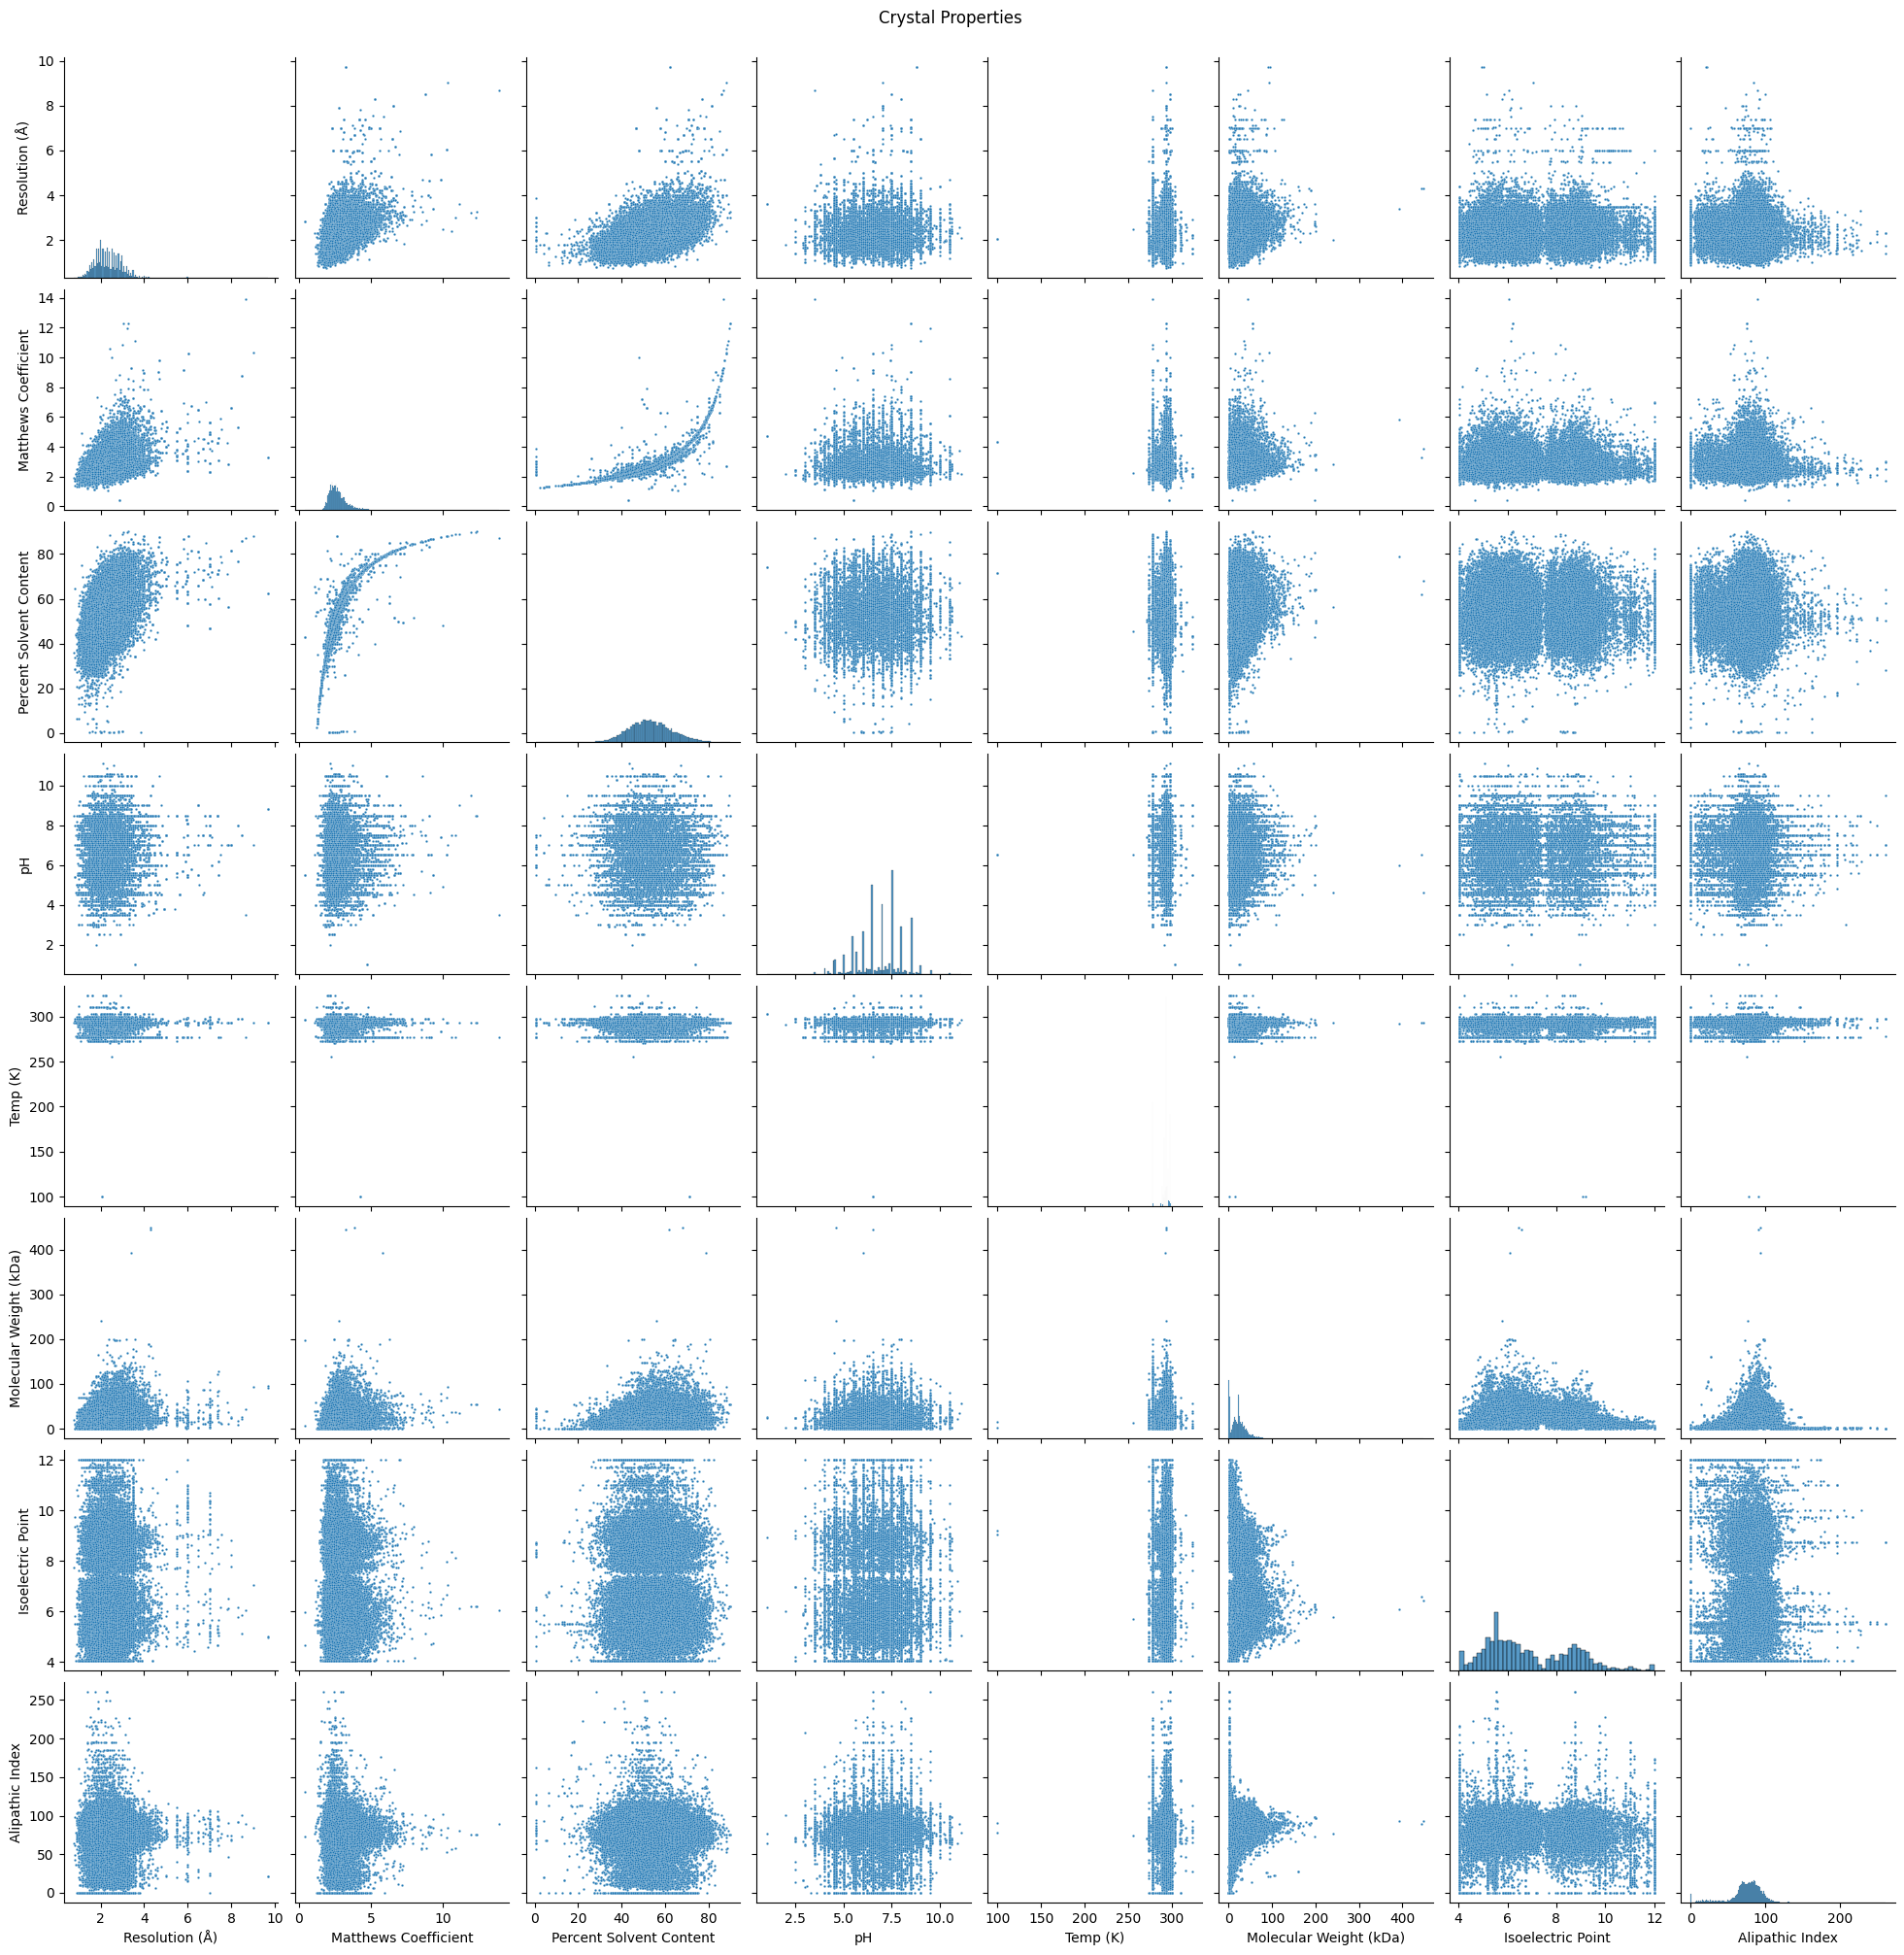

In [9]:
#general crystal properties
df1_subset3 = df1[['Resolution (Å)', 'Matthews Coefficient', 'Percent Solvent Content', 'pH',
                   'Temp (K)', 'Molecular Weight (kDa)','Isoelectric Point', 'Alipathic Index']]

plt.figure(figsize=(25,25))
graph = sns.pairplot(df1_subset3, plot_kws={"s": 3})
graph.fig.suptitle('Crystal Properties', y=1.01)
plt.show()